# Evasion - foolbox

https://github.com/jonasrauber/foolbox-native-tutorial/blob/master/foolbox-native-tutorial.ipynb

In [1]:
import foolbox as fb

In [2]:
import torch
import torchvision
import tensorflow as tf

Pytorch

In [7]:
# model
model = torchvision.models.resnet18(pretrained=True)

In [8]:
model = model.eval()

Tensorflow

In [5]:
model = tf.keras.applications.MobileNetV2(weights="imagenet")

***

In [9]:
preprocessing = dict(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], axis=-3)
bounds = (0, 1)
fmodel = fb.PyTorchModel(model, bounds=bounds, preprocessing=preprocessing)

## Transform bounds

We are going to work with a model that has (0, 1) bounds, lets use fmodel.transform_bounds.

In [10]:
fmodel = fmodel.transform_bounds((0, 1))

## Samples

In [11]:
images, labels = fb.utils.samples(fmodel, dataset='imagenet', batchsize=16)
labels

tensor([243, 559, 438, 990, 949, 853, 609, 609, 915, 455, 541, 630, 741, 471,
        129,  99], device='cuda:0')

Current accuracy

In [12]:
fb.utils.accuracy(fmodel, images, labels)

0.9375

## Attack

In [13]:
# the next attack is based on DeepFool - https://arxiv.org/abs/1511.04599
attack = fb.attacks.LinfDeepFoolAttack()

There is more information about the attacks available in the framework
https://foolbox.jonasrauber.de/guide/adding_attacks.html#the-attack-base-class

In [8]:
help(attack)

Help on LinfDeepFoolAttack in module foolbox.attacks.deepfool object:

class LinfDeepFoolAttack(DeepFoolAttack)
 |  LinfDeepFoolAttack(*, steps: int = 50, candidates: Optional[int] = 10, overshoot: float = 0.02, loss: Union[Literal['logits'], Literal['crossentropy']] = 'logits')
 |  
 |  A simple and fast gradient-based adversarial attack.
 |  
 |  Implements the `DeepFool`_ L-Infinity attack.
 |  
 |  Args:
 |      steps : Maximum number of steps to perform.
 |      candidates : Limit on the number of the most likely classes that should
 |          be considered. A small value is usually sufficient and much faster.
 |      overshoot : How much to overshoot the boundary.
 |      loss  Loss function to use inside the update function.
 |  
 |  
 |  .. _DeepFool:
 |          Seyed-Mohsen Moosavi-Dezfooli, Alhussein Fawzi, Pascal Frossard,
 |          "DeepFool: a simple and accurate method to fool deep neural
 |          networks", https://arxiv.org/abs/1511.04599
 |  
 |  Method resoluti

In [14]:
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)

In [15]:
is_adv

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')

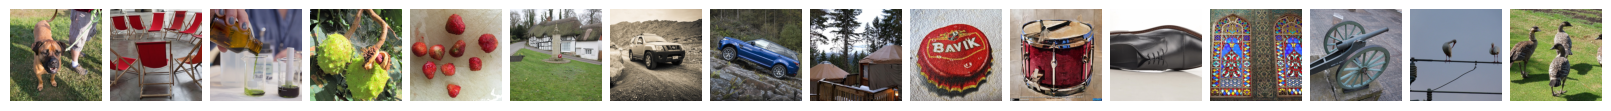

In [23]:
fb.plot.images(raw)

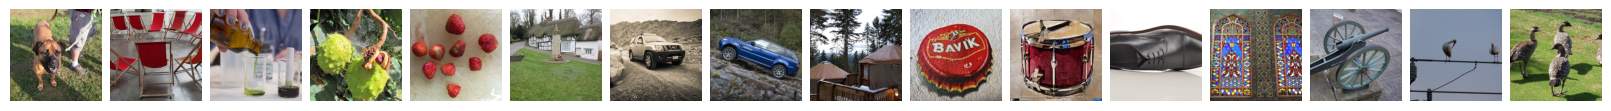

In [16]:
fb.plot.images(images)

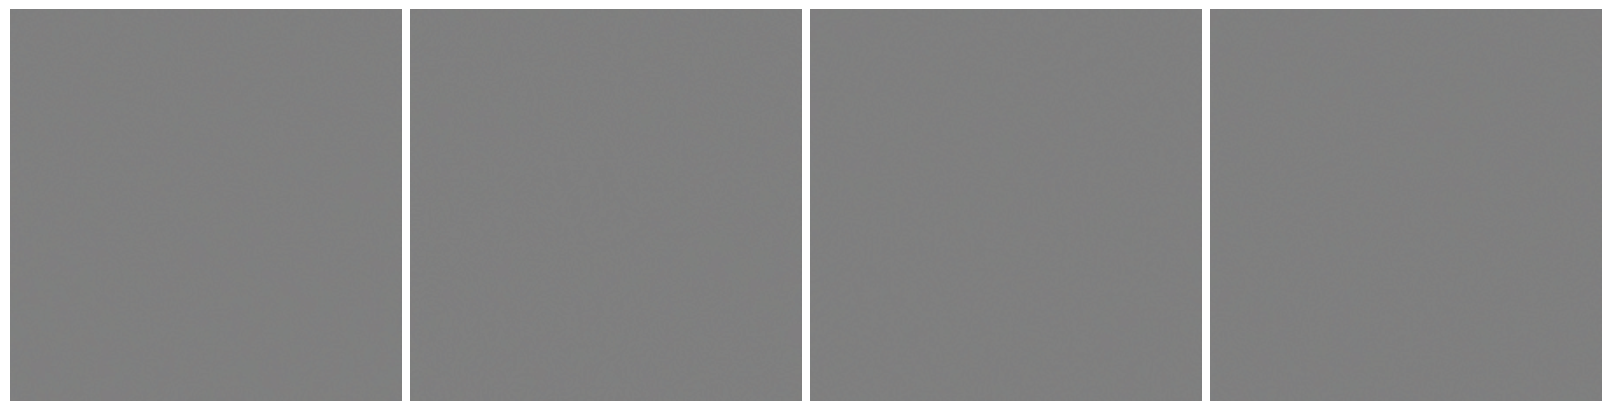

In [17]:
fb.plot.images(images - raw, n=4, bounds=(-0.1, 0.1), scale=4.)

In [19]:
fb.distances.l2(images, raw)

tensor([0.2348, 0.3468, 0.1984, 0.2229, 0.3777, 0.3069, 0.1016, 0.0000, 0.9028,
        0.6223, 0.5545, 0.2575, 0.4162, 0.2882, 0.0910, 0.5129],
       device='cuda:0')

In [22]:
import numpy as np

epsilons = np.linspace(0.0, 0.005, num=20)

raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)

is_adv.shape

torch.Size([20, 16])

In [24]:

is_adv

tensor([[False, False, False, False, False, False, False,  True, False, False,
         False, False, False, False, False, False],
        [False, False, False, False, False, False,  True,  True, False, False,
         False, False, False, False,  True, False],
        [False, False,  True,  True, False, False,  True,  True, False, False,
         False, False, False, False,  True, False],
        [ True, False,  True,  True, False,  True,  True,  True, False, False,
         False,  True, False,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True,  True, False, False,
         False,  True, False,  True,  True, False],
        [ True,  True,  True,  True,  True,  True,  True,  True, False, False,
         False,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True, False, False,
          True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True, False,  True,
    

### targeted class

In [22]:
raw

tensor([[[[0.7484, 0.7563, 0.8151,  ..., 0.2190, 0.2229, 0.2308],
          [0.7692, 0.7418, 0.7653,  ..., 0.2347, 0.2190, 0.2778],
          [0.8045, 0.7692, 0.7575,  ..., 0.2268, 0.2504, 0.3837],
          ...,
          [0.2986, 0.2543, 0.2281,  ..., 0.4661, 0.4320, 0.4084],
          [0.1445, 0.2425, 0.1876,  ..., 0.3563, 0.3680, 0.3680],
          [0.1916, 0.2935, 0.3092,  ..., 0.2320, 0.4398, 0.4935]],

         [[0.6778, 0.6896, 0.7406,  ..., 0.0308, 0.0359, 0.0634],
          [0.6986, 0.6712, 0.6896,  ..., 0.0190, 0.0386, 0.1719],
          [0.7222, 0.6908, 0.6751,  ..., 0.0202, 0.1366, 0.3916],
          ...,
          [0.3418, 0.3249, 0.2751,  ..., 0.4661, 0.4241, 0.4241],
          [0.1916, 0.2896, 0.2347,  ..., 0.3445, 0.3563, 0.3771],
          [0.2308, 0.3053, 0.3484,  ..., 0.2202, 0.4320, 0.4739]],

         [[0.5339, 0.5170, 0.5798,  ..., 0.0739, 0.0712, 0.0751],
          [0.5418, 0.4869, 0.5092,  ..., 0.0778, 0.0712, 0.1575],
          [0.5810, 0.5183, 0.4947,  ..., 0